This is an analysis of a Fraud Detection dataset found on Kaggle. This was my first machine learning project, so some of the methods I used when analysing the dataset aren't as refined as some of my later works.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
data = pd.read_csv('creditcard.csv')

In [44]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [46]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [47]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


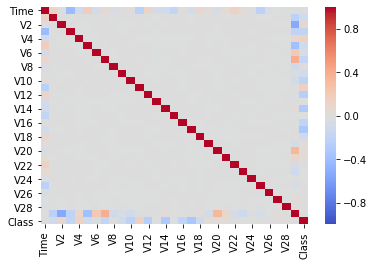

In [48]:
sns.heatmap(data.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1)

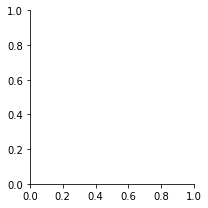

In [49]:
g = sns.FacetGrid(data, )

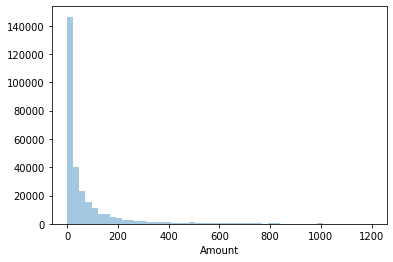

In [50]:
sns.distplot(data[data['Amount'] < 1200]['Amount'], kde = False)

In [51]:
X = data.drop(labels = 'Class', axis = 1)

In [52]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [53]:
y = data['Class']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [55]:
scaled_data

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [56]:
from sklearn.decomposition import PCA


In [57]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [58]:
x_pca.shape

(284807, 3)

In [59]:
x_pca

array([[ 0.43391953, -2.51771569, -0.03969336],
       [-0.38979744, -2.08485496,  0.06329056],
       [ 1.81791359, -2.43373907, -0.47301485],
       ...,
       [-0.21317541,  2.05213897, -0.88352098],
       [-0.45376414,  1.174483  , -1.44726448],
       [ 0.77529045,  1.9515336 ,  0.1265564 ]])

In [60]:
x_pca[:,0]

array([ 0.43391953, -0.38979744,  1.81791359, ..., -0.21317541,
       -0.45376414,  0.77529045])

C:\Users\Mick4\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


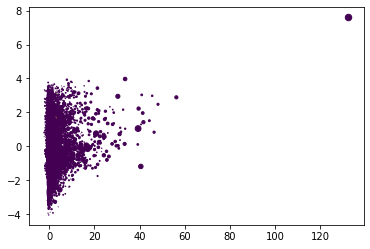

In [61]:
plt.scatter(x = x_pca[:,0], y = x_pca[:,1], s = x_pca[:,2], c = y)

In [62]:
data.groupby('Class').count()['Time']

Class
0    284315
1       492
Name: Time, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 88)

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(X_train, y_train)

logit_pred = logit.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, logit_pred))

print(confusion_matrix(y_test, logit_pred))

C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.84      0.49      0.62       157

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.75      0.81     85443
weighted avg       1.00      1.00      1.00     85443

[[85271    15]
 [   80    77]]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 88)
logit = LogisticRegression()
logit.fit(X_train, y_train)

logit_pca_pred = logit.predict(X_test)

print(classification_report(y_test, logit_pca_pred))

print(confusion_matrix(y_test, logit_pca_pred))

C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.72      0.24      0.36       157

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.86      0.62      0.68     85443
weighted avg       1.00      1.00      1.00     85443

[[85271    15]
 [  119    38]]


In [65]:
from imblearn.under_sampling import RandomUnderSampler

In [66]:
rus = RandomUnderSampler(random_state = 420)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [67]:
#logistic regression with resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 88)

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print(classification_report(y_test, logit_pred))
print(confusion_matrix(y_test, logit_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       137
           1       1.00      0.89      0.94       159

   micro avg       0.94      0.94      0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296

[[137   0]
 [ 18 141]]


C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 88)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       137
           1       1.00      0.91      0.95       159

   micro avg       0.95      0.95      0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

[[137   0]
 [ 15 144]]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 88)

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

print(classification_report(y_test, gbc_pred))
print(confusion_matrix(y_test, gbc_pred))



              precision    recall  f1-score   support

           0       0.91      0.98      0.94       137
           1       0.98      0.92      0.95       159

   micro avg       0.95      0.95      0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

[[134   3]
 [ 13 146]]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 88)

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       137
           1       1.00      0.06      0.11       159

   micro avg       0.49      0.49      0.49       296
   macro avg       0.74      0.53      0.38       296
weighted avg       0.76      0.49      0.36       296

[[137   0]
 [150   9]]


C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [71]:
#hyperparameter tuning for SVM
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5173913043478261, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5152838427947598, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5152838427947598, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5173913043478261, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5152838427947598, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5152838427947598, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5173913043478261, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5152838427947598, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5152838427947598, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.6026200873362445, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5347826086956522, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.537117903930131, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5240174672489083, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5347826086956522, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.537117903930131, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5240174672489083, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf .....

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    6.4s finished


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 88)

#XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)

In [73]:
#XGBoost predictions
preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
print(confusion_matrix(y_test,best_preds))
print(classification_report(y_test,best_preds))

[[132   5]
 [ 13 146]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       137
           1       0.97      0.92      0.94       159

   micro avg       0.94      0.94      0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy = {}

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracy[i] = (accuracy_score(y_test, knn_pred))


In [77]:
accuracy

{1: 0.6013513513513513,
 2: 0.6114864864864865,
 3: 0.6114864864864865,
 4: 0.6047297297297297,
 5: 0.625,
 6: 0.5777027027027027,
 7: 0.6013513513513513,
 8: 0.5912162162162162,
 9: 0.5844594594594594,
 10: 0.597972972972973,
 11: 0.6081081081081081,
 12: 0.5878378378378378,
 13: 0.597972972972973,
 14: 0.5912162162162162,
 15: 0.6114864864864865,
 16: 0.581081081081081,
 17: 0.5878378378378378,
 18: 0.5878378378378378,
 19: 0.5945945945945946,
 20: 0.5912162162162162,
 21: 0.5709459459459459,
 22: 0.5608108108108109,
 23: 0.5709459459459459,
 24: 0.5709459459459459,
 25: 0.5743243243243243,
 26: 0.5574324324324325,
 27: 0.581081081081081,
 28: 0.6114864864864865,
 29: 0.6114864864864865,
 30: 0.6148648648648649,
 31: 0.6216216216216216,
 32: 0.6182432432432432,
 33: 0.6013513513513513,
 34: 0.6182432432432432,
 35: 0.6182432432432432,
 36: 0.6148648648648649,
 37: 0.6114864864864865,
 38: 0.6216216216216216,
 39: 0.6216216216216216,
 40: 0.6216216216216216,
 41: 0.6047297297297297,
 

In [78]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.54      0.66      0.59       137
           1       0.63      0.50      0.56       159

   micro avg       0.58      0.58      0.58       296
   macro avg       0.59      0.58      0.58       296
weighted avg       0.59      0.58      0.58       296

[[91 46]
 [79 80]]
